# Linear regression model implementation

In [ ]:
# Loss function -> minimized
# L(w, b) = (Xw + b - Y)^2 / n
# Partial derivative == 0 <- convex
# dL/dw = dL/dz * dz/dw <- chain rule, dL/dz = 2z/n = 2(Xw + b - Y), dz/dw = X, dL/dw = 2X.T(Xw + b - Y)/n
# dL/db = dL/dz * dz/db, dz/db = 1, dL/db = 2(Xw + b - Y)/n

In [4]:
# Optimisation method -> Gradient Decent
# 1) Initialize weight w and bias b
# 2) Calculate Gradient -> new_w = w - learning_rate * dL/dw
#                       -> new_b = b - leanring_rate * dL/db
# 3) stopping criteria -> num_of_iteration

In [43]:
# import library
import numpy as np

# implement Linear regression class
class LinearRegression:
    def __init__(self, learning_rate = 1e-3, n_iters = 1000):
        self.weight = None
        self.bias = None
        self.learning_rate = learning_rate
        self.n_iters = n_iters
    
    # define helper function
    def _initialize(self):
        self.weight = np.zeros(self.n_feature)
        self.bias = 0
    
    def _get_prediction(self, X):
        return np.dot(X, self.weight) + self.bias
    
    def _get_gradient(self, X, y, y_hat):
        error = y_hat - y
        
        dw = (1 / self.n_samples) * np.dot(X.T, error)
        db = (1 / self.n_samples) * np.sum(error)
        
        return dw, db
    
    def _update_para(self, dw, db):
        self.weight -= self.learning_rate * dw
        self.bias -= self.learning_rate * db
    
    # define main function
    def fit(self, X, y):
        self.n_samples, self.n_feature = len(X), len(X[0])
        
        self._initialize()
        
        for _ in range(self.n_iters):
            y_hat = self._get_prediction(X)
            
            dw, db = self._get_gradient(X, y, y_hat)
            
            self._update_para(dw, db)
    
    def predict(self, X):
        y_predict = self._get_prediction(X)
        
        return y_predict

RMSE: 20.774915888064392


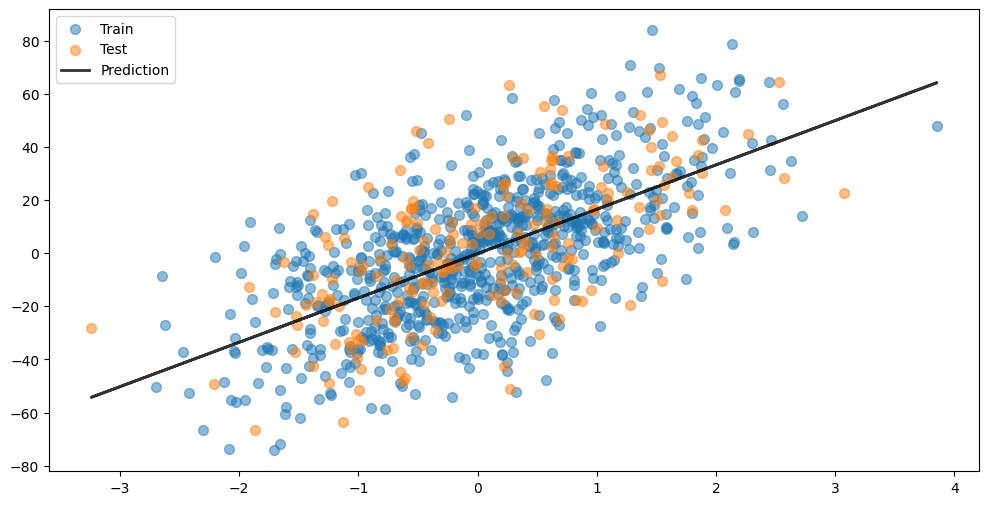

In [55]:
# Testing for model performance
if __name__ == '__main__':
    from matplotlib import pyplot as plt
    from sklearn import datasets
    from sklearn.model_selection import train_test_split
    
    def rmse(y_hat, y):
        return np.sqrt(np.mean((y_hat - y) ** 2))
    
    X, y = datasets.make_regression(n_samples=1000, n_features=1, noise=20, random_state=42)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    linreg = LinearRegression(learning_rate=0.01)
    linreg.fit(X_train, y_train)
    
    y_hat = linreg.predict(X_test)
    
    print(f'RMSE: {rmse(y_hat, y_test)}')
    
    fig, ax = plt.subplots(1, 1, figsize=(12,6))
    
    ax.scatter(
        X_train,
        y_train,
        s=50,
        alpha=0.5,
        label='Train'
    )
    
    ax.scatter(
        X_test,
        y_test,
        s=50,
        alpha=0.5,
        label='Test'
    )
    
    ax.plot(
        X, linreg.predict(X),
        c='black', lw=2, alpha=0.8, label='Prediction'
    )
    
    plt.legend()
    plt.show()

<b> End </b>